In [14]:
import torch
import numpy as np 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import torch.nn as nn 
import torch.nn.functional as F
from model import resnet18

In [2]:
upper_threshold=0.9
lower_threshold=0.5

In [3]:
def imshow(img):
    img=img.numpy()
    plt.imshow(np.transpose(img,(1,2,0)) , cmap='gray')
    plt.show()

In [4]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset=torchvision.datasets.MNIST(root='/home/zyx/datasets/',train=True,download=False,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='/home/zyx/datasets/',download=False,transform=transform)
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=False,num_workers=2)

In [5]:
data_iter=iter(train_loader)
images,labels=data_iter.next()
print(images.shape)

torch.Size([32, 1, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 1, 28, 28])


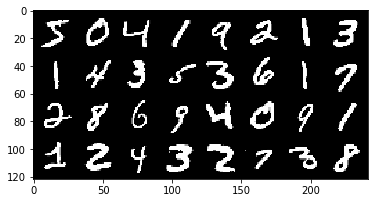

In [15]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=resnet18()
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 1, 28, 28])


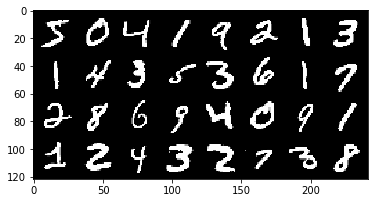

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[32, 1, 28, 28] to have 3 channels, but got 1 channels instead

In [13]:
data_iter=iter(train_loader)
images,labels=data_iter.next()
print(images.shape)
imshow(torchvision.utils.make_grid(images))

images=images.to(device)
labels=labels.to(device)
model.eval()
features=model(images)
cos_dist_matrix=torch.mm(features,features.transpose(0,1))
print(features)
#print(cos_dist_matrix.shape)